In [95]:
import pandas as pd
from pandas.api.types import is_object_dtype
from pandas.api.types import is_int64_dtype
from pandas.api.types import is_integer_dtype
from pandas.api.types import is_float_dtype

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

# Project_20

There is a file to be examined here related to Covid dataset and need to conduct 2 tasks:

    TASK 1
    • Predict confirmed COVID-19 cases among suspected cases.
    Based on the results of laboratory tests commonly collected for a suspected COVID-19 case during a visit to the emergency room, would it be possible to predict the test result for SARS-Cov-2 (positive/negative)?

    TASK 2
    • Predict admission to general ward, semi-intensive unit or intensive care unit among confirmed COVID-19 cases.
    Based on the results of laboratory tests commonly collected among confirmed COVID-19 cases during a visit to the emergency room, would it be possible to predict which patients will need to be admitted to a general ward, semi-intensive unit or intensive care unit?

In [96]:
df=pd.read_csv('covid19_clinical_dataset.csv' , encoding= 'unicode_escape')
df.head()

,Patient_ID,Patient_age_quantile,SARS-Cov-2_exam_result,Patient_addmited_to_regular_ward,Patient_addmited_to_semi-intensive_unit,Patient_addmited_to_intensive_care _unit,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume,...,Hb_saturation_arterial_blood_gases,pCO2_arterial_blood_gas_analysis,Base_excess_arterial_blood_gas_analysis,pH_arterial_blood_gas_analysis,Total_CO2_arterial_blood_ gas_analysis,HCO3_arterial_blood_gas_analysis,pO2_arterial_blood_gas_analysis,Arteiral_Fio2,Phosphor,ctO2_arterial_blood_gas_analysis
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Observations:

    1. Patient_ID column can be dropped as it is not necessary for prediction of covid cases.
    2. Also many columns names  be updated in standard form.

In [97]:
# dropping Patient_ID column

df.drop(['Patient_ID'], axis=1, inplace=True)
df.head()

,Patient_age_quantile,SARS-Cov-2_exam_result,Patient_addmited_to_regular_ward,Patient_addmited_to_semi-intensive_unit,Patient_addmited_to_intensive_care _unit,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume,Red_blood_Cells,...,Hb_saturation_arterial_blood_gases,pCO2_arterial_blood_gas_analysis,Base_excess_arterial_blood_gas_analysis,pH_arterial_blood_gas_analysis,Total_CO2_arterial_blood_ gas_analysis,HCO3_arterial_blood_gas_analysis,pO2_arterial_blood_gas_analysis,Arteiral_Fio2,Phosphor,ctO2_arterial_blood_gas_analysis
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
df.shape

(5644, 110)

In [99]:
# Checking which all columns have null values
df.isnull().sum().sort_values(ascending=False)

Prothrombin_time_activity                   5644
D_Dimer                                     5644
Mycoplasma_pneumoniae                       5644
Urine_Sugar                                 5644
Partial_thromboplastin_time                 5644
                                            ... 
Patient_addmited_to_intensive_care _unit       0
Patient_addmited_to_semi-intensive_unit        0
Patient_addmited_to_regular_ward               0
SARS-Cov-2_exam_result                         0
Patient_age_quantile                           0
Length: 110, dtype: int64

# Observations:
    
    1.Columns ['Prothrombin_time_activity','D_Dimer','Mycoplasma_pneumoniae','Urine_Sugar','Partial_thromboplastin_time','Fio2_venous_blood_gas_analysis','Urine_Nitrite','Vitamin_B12','Lipase_dosage','Albumin','Phosphor','Arteiral_Fio2','Ferritin','Base_excess_arterial_blood_gas_analysis','pO2_arterial_blood_gas_analysis','HCO3_arterial_blood_gas_analysis','pCO2_arterial_blood_gas_analysis','Total_CO2_arterial_blood_ gas_analysis','Arterial_Lactic_Acid','pH_arterial_blood_gas_analysis','Hb_saturation_arterial_blood_gases','ctO2_arterial_blood_gas_analysis']are having null values with more than 5600 rows.
    
    2.These can be dropped as 5600 records are null out of 5644.
    


In [100]:
df.drop(['Prothrombin_time_activity','D_Dimer','Mycoplasma_pneumoniae','Urine_Sugar','Partial_thromboplastin_time','Fio2_venous_blood_gas_analysis','Urine_Nitrite','Vitamin_B12','Lipase_dosage','Albumin','Phosphor','Arteiral_Fio2','Ferritin','Base_excess_arterial_blood_gas_analysis','pO2_arterial_blood_gas_analysis','HCO3_arterial_blood_gas_analysis','pCO2_arterial_blood_gas_analysis','Total_CO2_arterial_blood_ gas_analysis','Arterial_Lactic_Acid','pH_arterial_blood_gas_analysis','Hb_saturation_arterial_blood_gases','ctO2_arterial_blood_gas_analysis'], axis=1, inplace=True)
df

,Patient_age_quantile,SARS-Cov-2_exam_result,Patient_addmited_to_regular_ward,Patient_addmited_to_semi-intensive_unit,Patient_addmited_to_intensive_care _unit,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume,Red_blood_Cells,...,Urine_Crystals,Urine_Red_blood_cells,Urine_Hyaline_cylinders,Urine_Granular_cylinders,Urine_Yeasts,Urine_Color,Relationship_Patient_Normal,International_normalized_ratio,Lactic_Dehydrogenase,Creatine_phosphokinase
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,10,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,Ausentes,-0.177169,absent,absent,absent,yellow,NaN,NaN,NaN,NaN


In [101]:
# Checking which all columns have null values
df.isnull().sum().sort_values(ascending=False)

Magnesium                                   5604
Ionized_calcium                             5594
Urine_Ketone_Bodies                         5587
Urine_Esterase                              5584
Urine_Protein                               5584
                                            ... 
Patient_addmited_to_intensive_care _unit       0
Patient_addmited_to_semi-intensive_unit        0
Patient_addmited_to_regular_ward               0
SARS-Cov-2_exam_result                         0
Patient_age_quantile                           0
Length: 88, dtype: int64

In [102]:
df.describe()

,Patient_age_quantile,Patient_addmited_to_regular_ward,Patient_addmited_to_semi-intensive_unit,Patient_addmited_to_intensive_care _unit,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume,Red_blood_Cells,Lymphocytes,...,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine_Density,Urine_Red_blood_cells,Relationship_Patient_Normal,International_normalized_ratio,Lactic_Dehydrogenase,Creatine_phosphokinase
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,...,9.700000e+01,9.700000e+01,9.700000e+01,97.0,7.000000e+01,7.000000e+01,9.100000e+01,1.330000e+02,1.010000e+02,1.040000e+02
mean,9.318391,0.013997,0.008859,0.007264,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,...,7.257732e-09,8.453608e-09,1.410309e-08,0.0,-2.585714e-09,7.585714e-09,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,...,1.005195e+00,1.005195e+00,1.005195e+00,0.0,1.007220e+00,1.007220e+00,1.005540e+00,1.003781e+00,1.004988e+00,1.004843e+00
min,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,-1.865070e+00,...,-1.020621e-01,-3.159653e-01,-2.331262e-01,0.0,-1.757493e+00,-2.022974e-01,-2.351347e+00,-1.797149e+00,-1.358584e+00,-5.157137e-01
25%,4.000000,0.000000,0.000000,0.000000,-5.188074e-01,-5.862439e-01,-6.053457e-01,-6.624832e-01,-5.679496e-01,-7.307069e-01,...,-1.020621e-01,-3.159653e-01,-2.331262e-01,0.0,-7.642155e-01,-2.022974e-01,-4.966165e-01,-6.654218e-01,-6.997738e-01,-3.769673e-01
50%,9.000000,0.000000,0.000000,0.000000,5.340703e-02,4.031596e-02,-1.217160e-01,-1.015171e-01,1.385207e-02,-1.426696e-02,...,-1.020621e-01,-3.159653e-01,-2.331262e-01,0.0,-5.473161e-02,-1.939214e-01,-8.948074e-02,-1.561442e-01,-3.308402e-01,-2.247505e-01
75%,14.000000,0.000000,0.000000,0.000000,7.171751e-01,7.295320e-01,5.314981e-01,6.838353e-01,6.661759e-01,5.976919e-01,...,-1.020621e-01,-3.159653e-01,-2.331262e-01,0.0,6.547523e-01,-1.660709e-01,4.533679e-01,2.965464e-01,4.729083e-01,3.523059e-02
max,19.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,3.764100e+00,...,9.797959e+00,6.136379e+00,6.550847e+00,0.0,2.499411e+00,7.821993e+00,4.705678e+00,7.369844e+00,2.950035e+00,7.216365e+00


In [103]:
       
for i in df.columns:
    if(is_float_dtype(df[i]) or is_integer_dtype(df[i])):
        df[i].fillna(df[i].mean(), inplace=True)
        
    if(is_object_dtype(df[i])):
        df[i].fillna('', inplace=True)
        
        print(df[i])

0       negative
1       negative
2       negative
3       negative
4       negative
          ...   
5639    positive
5640    negative
5641    negative
5642    negative
5643    positive
Name: SARS-Cov-2_exam_result, Length: 5644, dtype: object
0                   
1       not_detected
2                   
3                   
4       not_detected
            ...     
5639                
5640                
5641                
5642                
5643                
Name: Respiratory_Syncytial_Virus, Length: 5644, dtype: object
0                   
1       not_detected
2                   
3                   
4       not_detected
            ...     
5639                
5640                
5641                
5642                
5643                
Name: Influenza_A, Length: 5644, dtype: object
0                   
1       not_detected
2                   
3                   
4       not_detected
            ...     
5639                
5640                
5641           

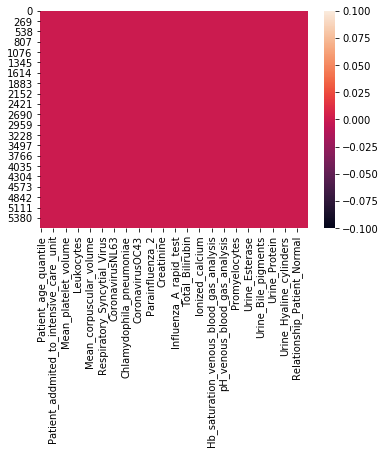

In [104]:
# Checking for null using HeatMap
sns.heatmap(df.isnull())

In [105]:
df.head()

,Patient_age_quantile,SARS-Cov-2_exam_result,Patient_addmited_to_regular_ward,Patient_addmited_to_semi-intensive_unit,Patient_addmited_to_intensive_care _unit,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume,Red_blood_Cells,...,Urine_Crystals,Urine_Red_blood_cells,Urine_Hyaline_cylinders,Urine_Granular_cylinders,Urine_Yeasts,Urine_Color,Relationship_Patient_Normal,International_normalized_ratio,Lactic_Dehydrogenase,Creatine_phosphokinase
0,13,negative,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,...,,7.585714e-09,,,,,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09
1,17,negative,0,0,0,2.365154e-01,-2.234027e-02,-5.174130e-01,1.067657e-02,1.020042e-01,...,,7.585714e-09,,,,,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09
2,8,negative,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,...,,7.585714e-09,,,,,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09
3,5,negative,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,...,,7.585714e-09,,,,,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09
4,15,negative,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,...,,7.585714e-09,,,,,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09


In [106]:
# Encoding columns as part of transformation.

from sklearn.preprocessing import LabelEncoder 
le= LabelEncoder()

for i in df.columns:
    if(is_object_dtype(df[i])):
        df[i] = le.fit_transform(df[i])
        
    df[i]

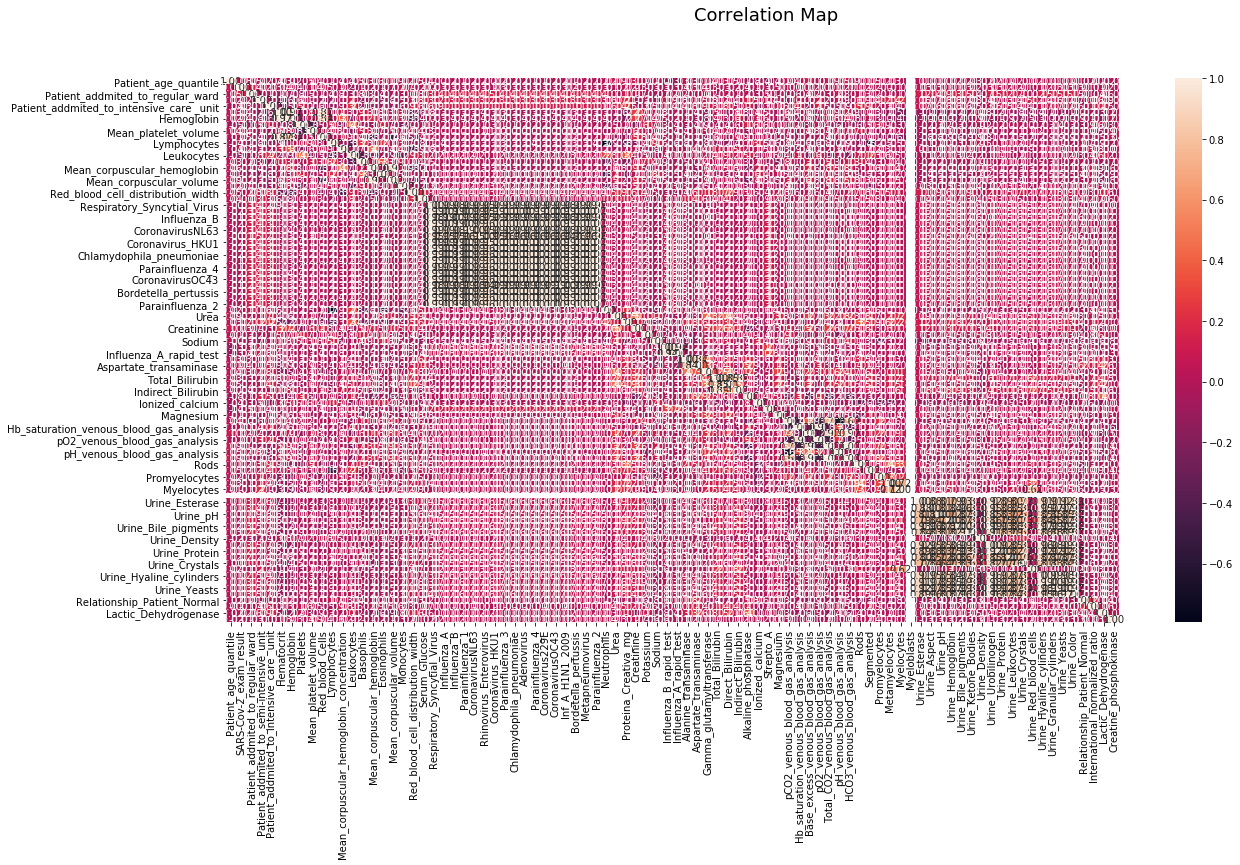

In [107]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True, fmt=".2f") 
plt.suptitle("Correlation Map", fontsize=18)
plt.show()  

In [108]:
# drop Myelocytes column 
df.drop(['Myelocytes'],axis=1, inplace=True)

In [109]:
# Setting x by excluding SARS-Cov-2_exam_result column which is y here
x=df.drop(['SARS-Cov-2_exam_result'],axis=1)
x

,Patient_age_quantile,Patient_addmited_to_regular_ward,Patient_addmited_to_semi-intensive_unit,Patient_addmited_to_intensive_care _unit,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume,Red_blood_Cells,Lymphocytes,...,Urine_Crystals,Urine_Red_blood_cells,Urine_Hyaline_cylinders,Urine_Granular_cylinders,Urine_Yeasts,Urine_Color,Relationship_Patient_Normal,International_normalized_ratio,Lactic_Dehydrogenase,Creatine_phosphokinase
0,13,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,...,0,7.585714e-09,0,0,0,0,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09
1,17,0,0,0,2.365154e-01,-2.234027e-02,-5.174130e-01,1.067657e-02,1.020042e-01,3.183658e-01,...,0,7.585714e-09,0,0,0,0,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09
2,8,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,...,0,7.585714e-09,0,0,0,0,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09
3,5,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,...,0,7.585714e-09,0,0,0,0,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09
4,15,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,...,0,7.585714e-09,0,0,0,0,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,...,0,7.585714e-09,0,0,0,0,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09
5640,17,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,...,0,7.585714e-09,0,0,0,0,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09
5641,4,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,...,0,7.585714e-09,0,0,0,0,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09
5642,10,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,...,1,-1.771692e-01,1,1,1,4,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09


In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scale = StandardScaler()
#scale = MinMaxScaler()
x=scale.fit_transform(x)

In [111]:
# Target label is SARS-Cov-2 exam result

y=df['SARS-Cov-2_exam_result']
y

0       0
1       0
2       0
3       0
4       0
       ..
5639    1
5640    0
5641    0
5642    0
5643    1
Name: SARS-Cov-2_exam_result, Length: 5644, dtype: int32

In [112]:
max_acc_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=r_state)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    accuracyScore=accuracy_score(test_y,pred)
    #print("Accuracy_Score corresponding to r_state: ",r_state," is ",accuracyScore)
    if(accuracyScore>max_acc_score):
        max_acc_score=accuracyScore
        final_rstate=r_state
        
print("\n\n")
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_acc_score)




Max_accuracy_Score corresponding to final_r_state:  91  is  0.923458540042523


In [113]:
# Setting the test x & y values and using the random state from above step.
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=91)

In [114]:
train_x.shape

(4233, 86)

In [115]:
test_y.shape

(1411,)

In [116]:
test_x.shape

(1411, 86)

In [117]:
test_x.shape

(1411, 86)

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [119]:
KNN=KNeighborsClassifier(n_neighbors=10)
#SV=SVC(kernel="linear", C=1)
LR=LogisticRegression()
DT=DecisionTreeClassifier(criterion='gini',max_depth=4)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=100,random_state=100)
ADC=AdaBoostClassifier(n_estimators=100,random_state=10)
GBC=GradientBoostingClassifier(n_estimators=100,random_state=10)

In [120]:
models=[]
models.append(('KNeighborsClassifier',KNN))
#models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))
models.append(('AdaBoostClassifier',ADC))
models.append(('GradientBoostingClassifier',GBC))

In [121]:
Model=[]
score=[]
cvs=[]
rocscore=[]

for name,model in models:
    print("--------------",name,"--------------")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    AS=accuracy_score(test_y,pre)
    print("Accuracy Score: ", AS)
    score.append(AS*100)
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print("Cross_Val_Score: ", sc)
    cvs.append(sc*100)
    cm=confusion_matrix(test_y,pre)
    print(cm)
    print("\n")

-------------- KNeighborsClassifier --------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
Accuracy Score:  0.9220411055988661
Cross_Val_Score:  0.9027298688257076
[[1300    0]
 [ 110    1]]


-------------- LogisticRegression --------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy Score:  0.923458540042523
Cross_Val_Score:  0.9006025230653361
[[1293    7]
 [ 101   10]]


-------------- DecisionTreeClassifier --------------
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, 

In [122]:
result=pd.DataFrame({"Model": Model, "Score": score, "Cross Val Score":cvs})
result

,Model,Score,Cross Val Score
0,KNeighborsClassifier,92.204111,90.272987
1,LogisticRegression,92.345854,90.060252
2,DecisionTreeClassifier,92.133239,89.954152
3,GaussianNB,89.298370,70.062982
4,RandomForestClassifier,92.274982,90.148936
5,AdaBoostClassifier,92.345854,90.060346
6,GradientBoostingClassifier,92.416726,90.344003


# GradientBoostingClassifier seems to be the best model with over 92% accuracy.

In [123]:
# Saving the prediction data in a file.

predictData=pd.DataFrame(pre)
df.to_csv('CovidCase_Predict.csv')
predictData

,0
0,0
1,0
2,0
3,0
4,0
...,...
1406,1
1407,0
1408,0
1409,0


In [124]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(GBC,"GBC_CovidCase.pkl")

['GBC_CovidCase.pkl']

# TASK 2
• Predict admission to general ward, semi-intensive unit or intensive care unit among confirmed COVID-19 cases.
Based on the results of laboratory tests commonly collected among confirmed COVID-19 cases during a visit to the emergency room, would it be possible to predict which patients will need to be admitted to a general ward, semi-intensive unit or intensive care unit?

In [125]:
df2=pd.read_csv('covid19_clinical_dataset.csv' , encoding= 'unicode_escape')
df2.head()

,Patient_ID,Patient_age_quantile,SARS-Cov-2_exam_result,Patient_addmited_to_regular_ward,Patient_addmited_to_semi-intensive_unit,Patient_addmited_to_intensive_care _unit,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume,...,Hb_saturation_arterial_blood_gases,pCO2_arterial_blood_gas_analysis,Base_excess_arterial_blood_gas_analysis,pH_arterial_blood_gas_analysis,Total_CO2_arterial_blood_ gas_analysis,HCO3_arterial_blood_gas_analysis,pO2_arterial_blood_gas_analysis,Arteiral_Fio2,Phosphor,ctO2_arterial_blood_gas_analysis
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Observation:
        1. Patient_ID column can be dropped as it is not.
        2. A target column is to be created combining Patient_addmited_to_regular_ward,Patient_addmited_to_semi-intensive_unit & Patient_addmited_to_intensive_care _unit.

In [126]:
#Define target column 'Patient_addimitted_ward_semi_intensive'
# dropping Patient_ID column

df2['Patient_addimitted_ward_semi_intensive'] = np.where(df2['Patient_addmited_to_regular_ward']
                          + df2['Patient_addmited_to_semi-intensive_unit']
                          + df2['Patient_addmited_to_intensive_care _unit']>=1,1,0)

df2.drop(['Patient_ID','Patient_addmited_to_regular_ward','Patient_addmited_to_semi-intensive_unit','Patient_addmited_to_intensive_care _unit'], axis = 1, inplace=True)

df2.head()

,Patient_age_quantile,SARS-Cov-2_exam_result,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration,Leukocytes,...,pCO2_arterial_blood_gas_analysis,Base_excess_arterial_blood_gas_analysis,pH_arterial_blood_gas_analysis,Total_CO2_arterial_blood_ gas_analysis,HCO3_arterial_blood_gas_analysis,pO2_arterial_blood_gas_analysis,Arteiral_Fio2,Phosphor,ctO2_arterial_blood_gas_analysis,Patient_addimitted_ward_semi_intensive
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [127]:
df2.shape

(5644, 108)

In [128]:
# Converting column into 'int64' type. 
df2['Patient_addimitted_ward_semi_intensive'] = df2['Patient_addimitted_ward_semi_intensive'].astype('int64') 

In [129]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 108 entries, Patient_age_quantile to Patient_addimitted_ward_semi_intensive
dtypes: float64(70), int64(2), object(36)
memory usage: 4.7+ MB


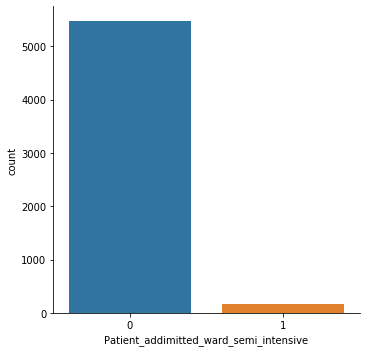

In [130]:
sns.catplot(x="Patient_addimitted_ward_semi_intensive", kind="count", data=df2)

In [131]:
# Checking which all columns have null values
df2.isnull().sum().sort_values(ascending=False)

Partial_thromboplastin_time               5644
Mycoplasma_pneumoniae                     5644
Prothrombin_time_activity                 5644
D_Dimer                                   5644
Urine_Sugar                               5644
                                          ... 
Respiratory_Syncytial_Virus               4290
Influenza_B                               4290
SARS-Cov-2_exam_result                       0
Patient_addimitted_ward_semi_intensive       0
Patient_age_quantile                         0
Length: 108, dtype: int64

# Observations:
    
    1.Columns ['Prothrombin_time_activity','D_Dimer','Mycoplasma_pneumoniae','Urine_Sugar','Partial_thromboplastin_time','Fio2_venous_blood_gas_analysis','Urine_Nitrite','Vitamin_B12','Lipase_dosage','Albumin','Phosphor','Arteiral_Fio2','Ferritin','Base_excess_arterial_blood_gas_analysis','pO2_arterial_blood_gas_analysis','HCO3_arterial_blood_gas_analysis','pCO2_arterial_blood_gas_analysis','Total_CO2_arterial_blood_ gas_analysis','Arterial_Lactic_Acid','pH_arterial_blood_gas_analysis','Hb_saturation_arterial_blood_gases','ctO2_arterial_blood_gas_analysis']are having null values with more than 5600 rows.
    
    2.These can be dropped as 5600 records are null out of 5644.
    


In [132]:
df2.drop(['Prothrombin_time_activity','D_Dimer','Mycoplasma_pneumoniae','Urine_Sugar','Partial_thromboplastin_time','Fio2_venous_blood_gas_analysis','Urine_Nitrite','Vitamin_B12','Lipase_dosage','Albumin','Phosphor','Arteiral_Fio2','Ferritin','Base_excess_arterial_blood_gas_analysis','pO2_arterial_blood_gas_analysis','HCO3_arterial_blood_gas_analysis','pCO2_arterial_blood_gas_analysis','Total_CO2_arterial_blood_ gas_analysis','Arterial_Lactic_Acid','pH_arterial_blood_gas_analysis','Hb_saturation_arterial_blood_gases','ctO2_arterial_blood_gas_analysis'], axis=1, inplace=True)
df2

,Patient_age_quantile,SARS-Cov-2_exam_result,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration,Leukocytes,...,Urine_Red_blood_cells,Urine_Hyaline_cylinders,Urine_Granular_cylinders,Urine_Yeasts,Urine_Color,Relationship_Patient_Normal,International_normalized_ratio,Lactic_Dehydrogenase,Creatine_phosphokinase,Patient_addimitted_ward_semi_intensive
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,17,negative,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5640,17,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5641,4,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5642,10,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.177169,absent,absent,absent,yellow,NaN,NaN,NaN,NaN,0


In [133]:
# FILLING THE MISSING VALUES

for i in df2.columns:
    if(is_float_dtype(df2[i]) or is_integer_dtype(df2[i])):
        df2[i].fillna(df2[i].mean(), inplace=True)
        
    if(is_object_dtype(df2[i])):
        df2[i].fillna('', inplace=True)
        
        print(df2[i])

0       negative
1       negative
2       negative
3       negative
4       negative
          ...   
5639    positive
5640    negative
5641    negative
5642    negative
5643    positive
Name: SARS-Cov-2_exam_result, Length: 5644, dtype: object
0                   
1       not_detected
2                   
3                   
4       not_detected
            ...     
5639                
5640                
5641                
5642                
5643                
Name: Respiratory_Syncytial_Virus, Length: 5644, dtype: object
0                   
1       not_detected
2                   
3                   
4       not_detected
            ...     
5639                
5640                
5641                
5642                
5643                
Name: Influenza_A, Length: 5644, dtype: object
0                   
1       not_detected
2                   
3                   
4       not_detected
            ...     
5639                
5640                
5641           

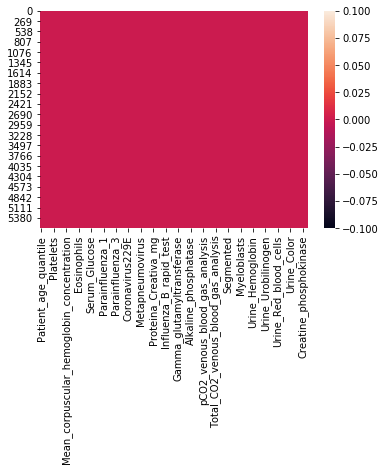

In [134]:
# Checking for null using HeatMap
sns.heatmap(df2.isnull())

In [135]:
# Encoding columns as part of transformation.

from sklearn.preprocessing import LabelEncoder 
le= LabelEncoder()

for i in df2.columns:
    if(is_object_dtype(df2[i])):
        df2[i] = le.fit_transform(df2[i])
        
    df2[i]

In [136]:
# Setting x by excluding  column 'Patient_addimitted_ward_semi_intensive' which is y here
x=df2.drop(['Patient_addimitted_ward_semi_intensive'],axis=1)
x

,Patient_age_quantile,SARS-Cov-2_exam_result,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration,Leukocytes,...,Urine_Crystals,Urine_Red_blood_cells,Urine_Hyaline_cylinders,Urine_Granular_cylinders,Urine_Yeasts,Urine_Color,Relationship_Patient_Normal,International_normalized_ratio,Lactic_Dehydrogenase,Creatine_phosphokinase
0,13,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,9.784053e-10,6.220930e-09,...,0,7.585714e-09,0,0,0,0,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09
1,17,0,2.365154e-01,-2.234027e-02,-5.174130e-01,1.067657e-02,1.020042e-01,3.183658e-01,-9.507903e-01,-9.461035e-02,...,0,7.585714e-09,0,0,0,0,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09
2,8,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,9.784053e-10,6.220930e-09,...,0,7.585714e-09,0,0,0,0,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09
3,5,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,9.784053e-10,6.220930e-09,...,0,7.585714e-09,0,0,0,0,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09
4,15,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,9.784053e-10,6.220930e-09,...,0,7.585714e-09,0,0,0,0,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,1,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,9.784053e-10,6.220930e-09,...,0,7.585714e-09,0,0,0,0,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09
5640,17,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,9.784053e-10,6.220930e-09,...,0,7.585714e-09,0,0,0,0,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09
5641,4,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,9.784053e-10,6.220930e-09,...,0,7.585714e-09,0,0,0,0,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09
5642,10,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,9.784053e-10,6.220930e-09,...,1,-1.771692e-01,1,1,1,4,-9.230769e-10,-4.774436e-09,1.752475e-09,-6.471154e-09


In [137]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scale = StandardScaler()
scale = MinMaxScaler()
x=scale.fit_transform(x)

In [138]:
# Target label is Patient_addimitted_ward_semi_intensive

y = df2['Patient_addimitted_ward_semi_intensive']
y

0       0
1       0
2       0
3       0
4       0
       ..
5639    0
5640    0
5641    0
5642    0
5643    0
Name: Patient_addimitted_ward_semi_intensive, Length: 5644, dtype: int64

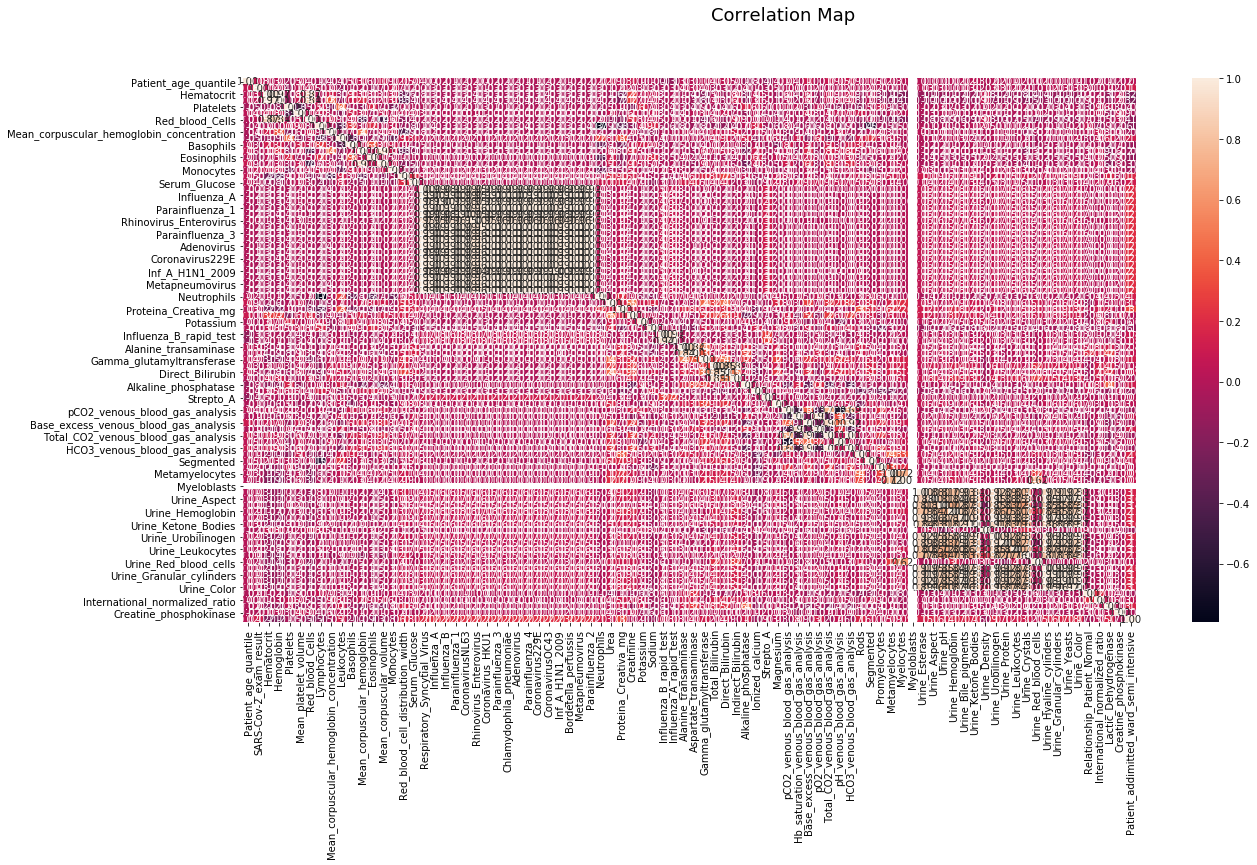

In [139]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df2.corr(), annot=True, fmt=".2f") 
plt.suptitle("Correlation Map", fontsize=18)
plt.show()  

In [140]:
# drop Myelocytes column 
df2.drop(['Myelocytes'],axis=1, inplace=True)

In [141]:
max_acc_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=r_state)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    accuracyScore=accuracy_score(test_y,pred)
    #print("Accuracy_Score corresponding to r_state: ",r_state," is ",accuracyScore)
    if(accuracyScore>max_acc_score):
        max_acc_score=accuracyScore
        final_rstate=r_state
        
print("\n\n")
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_acc_score)




Max_accuracy_Score corresponding to final_r_state:  67  is  0.9815733522324592


In [142]:
# Setting the test x & y values and using the random state from above step.

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=71)

In [143]:
train_x.shape

(4233, 85)

In [144]:
train_y.shape

(4233,)

In [145]:
test_x.shape

(1411, 85)

In [146]:
test_y.shape

(1411,)

In [147]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [148]:
KNN=KNeighborsClassifier(n_neighbors=9)
#SV=SVC(kernel="linear", C=10)
LR=LogisticRegression()
DT=DecisionTreeClassifier(criterion='gini',max_depth=4)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=100,random_state=100)
ADC=AdaBoostClassifier(n_estimators=100,random_state=10)
GBC=GradientBoostingClassifier(n_estimators=100,random_state=10)

In [149]:
models=[]
models.append(('KNeighborsClassifier',KNN))
#models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))
models.append(('AdaBoostClassifier',ADC))
models.append(('GradientBoostingClassifier',GBC))

In [150]:
Model=[]
score=[]
cvs=[]
rocscore=[]

for name,model in models:
    print("--------------",name,"--------------")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    AS=accuracy_score(test_y,pre)
    print("Accuracy Score: ", AS)
    score.append(AS*100)
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print("Cross_Val_Score: ", sc)
    cvs.append(sc*100)
    cm=confusion_matrix(test_y,pre)
    print(cm)
    print("\n")

-------------- KNeighborsClassifier --------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')
Accuracy Score:  0.9787384833451452
Cross_Val_Score:  0.9705880876168959
[[1380    0]
 [  30    1]]


-------------- LogisticRegression --------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy Score:  0.9808646350106307
Cross_Val_Score:  0.9736000753153833
[[1380    0]
 [  27    4]]


-------------- DecisionTreeClassifier --------------
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, 

In [151]:
result=pd.DataFrame({"Model": Model, "Score": score, "Cross Val Score":cvs})
result

,Model,Score,Cross Val Score
0,KNeighborsClassifier,97.873848,97.058809
1,LogisticRegression,98.086464,97.360008
2,DecisionTreeClassifier,98.724309,97.573338
3,GaussianNB,95.605953,93.729053
4,RandomForestClassifier,98.582566,97.626059
5,AdaBoostClassifier,98.369950,97.714680
6,GradientBoostingClassifier,98.795181,97.803364


# GradientBosstingClassifier seems to be the best model with over 98% accuracy.

In [152]:
# Saving the prediction data in a file.

predictData=pd.DataFrame(pre)
df2.to_csv('PatientAdmit_Predict.csv')
predictData

,0
0,0
1,1
2,0
3,0
4,0
...,...
1406,0
1407,0
1408,0
1409,0


In [153]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(GBC,"GBC_Patient_Admitted.pkl")

['GBC_Patient_Admitted.pkl']